Parte 3: Regresión

Usa  el  conjunto  de  datos  de  la  diabetes  que  puedes  cargar  con  la  función 
sklearn.datasets.load_diabetes
En este caso, realizaremos una tarea de regresión donde cada elemento del conjunto de datos 
es un paciente descrito por una serie de características y un conjunto medidas sobre el suero 
sanguíneo. La variable a predecir es una medida cuantitativa del progreso de la enfermedad un 
año más tarde.  





In [59]:
import numpy as np
import sklearn
import statistics as stat
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


# .data, .target, .feature_names, .DESCR, .target_names
dbts = sklearn.datasets.load_diabetes()

# descripcion del conjunto
print(dbts.DESCR)



.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

   1) Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, su distribución. 
   
Presta especial atención a la matriz  de gráficos  de  dispersión  y en especial a la  fila  de la variable a predecir, ya que nos interesa saber qué variables que están relacionadas con ella. 
  
    - Nombre del conjunto de datos
        Diabetes dataset

    - Breve descripción del problema que describe
        Representar los resultados de un analisis de sangre de pacientes diabéticos. Incluye una medida de la progresión de la enfermedad un año después del analisis.
        
    - Nombre y tipo de las variables
          - Age
          - Sex
          - Body mass index
          - Average blood pressure
          - S1
          - S2
          - S3
          - S4
          - S5
          - S6

         todas las variables son de tipo numpy.float64

    - Estadísticos descriptivos de cada variable
        Printeados en la siguiente celda

In [60]:
# Distribución de datos 
for j in range(0, len(dbts.data[0])):
    X = []
    for i in range(0, len(dbts.data)):
        X.append(dbts.data[i][j])
    
    print(dbts.feature_names[j], "(", j, ")")
    print("\tMedia: ", stat.mean(X))
    print("\tDeviación típica: ", stat.stdev(X))
    print("\tVarianza: ", stat.variance(X))
    print("\tMediana: ", stat.median(X))
    print("\tMáximo: ", max(X))    
    print("\tMínimo: ", min(X), "\n")

age ( 0 )
	Media:  -3.6356095201983384e-16
	Deviación típica:  0.04761904761904939
	Varianza:  0.0022675736961452935
	Mediana:  0.00538306037424807
	Máximo:  0.110726675453815
	Mínimo:  -0.107225631607358 

sex ( 1 )
	Media:  1.2880910516189776e-16
	Deviación típica:  0.04761904761904763
	Varianza:  0.002267573696145126
	Mediana:  -0.044641636506989
	Máximo:  0.0506801187398187
	Mínimo:  -0.044641636506989 

bmi ( 2 )
	Media:  -8.02222405405717e-16
	Deviación típica:  0.047619047619052106
	Varianza:  0.002267573696145552
	Mediana:  -0.00728376620968916
	Máximo:  0.17055522598066
	Mínimo:  -0.0902752958985185 

bp ( 3 )
	Media:  1.2855154582228017e-16
	Deviación típica:  0.04761904761904805
	Varianza:  0.0022675736961451655
	Mediana:  -0.00567061055493425
	Máximo:  0.132044217194516
	Mínimo:  -0.112399602060758 

s1 ( 4 )
	Media:  -8.980591318516838e-17
	Deviación típica:  0.0476190476190479
	Varianza:  0.0022675736961451512
	Mediana:  -0.00432086553661359
	Máximo:  0.153913713156516
	M

In [61]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
    plt.show()

# Función para extraer columnas de una matriz: recibe una matriz y dos indices
# Devuelve una matriz con las columnas de los indices
def column(matrix, i, j):
    return np.array([np.array([row[i], row[j]]) for row in matrix])

   2) Considera  si  debes  normalizar  o estandarizar las  variables antes  para  usar  un  perceptrón multicapa. Razona tu elección. 
   A pesar de que los datos ya vienen centrados y escalados, decidimos normalizarlos para disminuir el tiempo de entrenamiento y evitar los minimos locales en la optimización del error.

Datos escalados: 


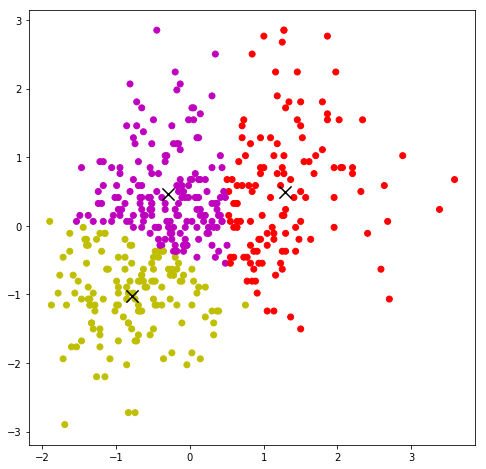

0.3407625083719344


In [62]:
# Copiamos a X las columnas 2 y 9 (indice de masa corporal y s6 (una medida de sangre))
X = column(dbts.data, 2, 9)

# Escalamos X 
scaler = StandardScaler()
scaler.fit(dbts.data)
dbts['data_scaled'] = scaler.transform(dbts.data)

# Y también escalamos la variable de salida
scaler = StandardScaler()
scaler.fit(dbts.target.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
dbts['target_scaled'] = scaler.transform(dbts.target.reshape(-1, 1))


#Definimos k-means para plotearlo escalado
km = KMeans(init='random', n_clusters=3)
km.fit(XSCALED)

print("Datos escalados: ")
plot_clusters(XSCALED, km.labels_, km.cluster_centers_)
   
silhouette = silhouette_score(XSCALED, km.labels_) 
print(silhouette_score(XSCALED, km.labels_))

   3) Vamos a entrenar dos tipos de redes: 
         - MLP1 con una capa oculta de 200 neuronas  
         - MLP2 con dos capas ocultas de 10 neuronas cada una 
        

C:\Users\choza\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


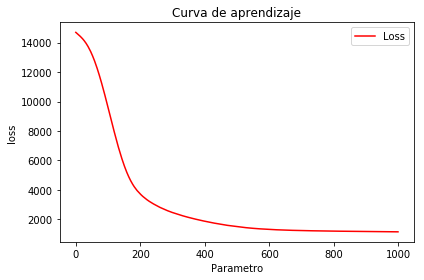

0.6352263036629238
0.3413692177190998


In [63]:
# Partimos el conjunto de datos en un 20% para test
X_train, X_test, y_train, y_test = train_test_split(dbts.data_scaled, dbts.target, 
                                                    test_size=0.3, random_state=0)

# Creamos un perceptrón multicapa
# optimiza el error cuadrático medio
# max_iter debe ser suficientemente alto para que la red se entrene
max_iter = 1000
mlp1 = MLPRegressor(hidden_layer_sizes=(200, ), # sólo 1 capa oculta de 200 neuronas
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlp1.fit(X_train, y_train)

# Pintar la evolución de la función de loss
plt.plot(range(max_iter), mlp1.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento y test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlp1.score(X_train, y_train))
print(mlp1.score(X_test, y_test))

C:\Users\choza\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


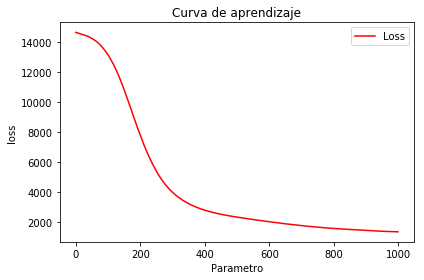

0.5700345788155676
0.3621094039038514


In [64]:
# Partimos el conjunto de datos en un 20% para test
X_train, X_test, y_train, y_test = train_test_split(dbts.data_scaled, dbts.target, 
                                                    test_size=0.3, random_state=0)

# Creamos un perceptrón multicapa
# optimiza el error cuadrático medio
# max_iter debe ser suficientemente alto para que la red se entrene
max_iter = 1000
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10),# 2 capas ocultas de 10 neuronas
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlp2.fit(X_train, y_train)

# Pintar la evolución de la función de loss
plt.plot(range(max_iter), mlp2.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento y test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlp2.score(X_train, y_train))
print(mlp2.score(X_test, y_test))

Realiza una validación cruzada de cada una de ellas con k=10 variando el parámetro alpha que controla el aprendizaje del perceptrón y determina el valor óptimo (es decir aquel que maximiza el Mean Square Error en negativo). Asegúrate  de  que  no  salen  warnings  indicando  que  no  se  ha  alcanzado  la  convergencia durante  el  entrenamiento  (basta  con  poner  un  número  de  max_iter  suficientemente grande). 
        
        Pinta la curva de aprendizaje de cada perceptrón. 
        
        ¿Alguno de los dos perceptrones domina al otro? 
        
        ¿Por qué crees que se producen las diferencias? 

In [ ]:
# MLP 1: 1 capa oculta de 200 neuronas

# Partimos el conjunto de datos en un 20% para test
X_train, X_test, y_train, y_test = train_test_split(dbts.data_scaled, dbts.target, 
                                                    test_size=0.2, random_state=0)


from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp1 = MLPRegressor(hidden_layer_sizes=(200, ), # sólo 1 capa oculta de 200 neuronas
                       activation='relu',           # función de activación para las capas ocultas
                       solver='adam',               # algoritmo para descenso de gradiente
                       alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                       batch_size='auto',           # por defecto 200
                       max_iter=10000,               # número de pasadas por los datos de entrada 
                       verbose=False)               # mostrar loss después de cada pasada
    mlp1.fit(X_train, y_train)

    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    # Validación cruzada en k=10 partes
    scores = cross_val_score(mlp1, dbts['data_scaled'], dbts['target_scaled'].ravel(), 
                             cv=10, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


C:\Users\choza\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\choza\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\choza\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\choza\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

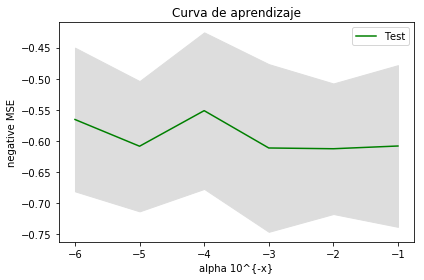

In [69]:
# MLP 2: 2 capas ocultas de 10 neuronas

# Partimos el conjunto de datos en un 20% para test
X_train, X_test, y_train, y_test = train_test_split(dbts.data_scaled, dbts.target, 
                                                    test_size=0.2, random_state=0)
from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10),# 2 capas ocultas de 10 neuronas
                       activation='relu',           # función de activación para las capas ocultas
                       solver='adam',               # algoritmo para descenso de gradiente
                       alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                       batch_size='auto',           # por defecto 200
                       max_iter=1000,               # número de pasadas por los datos de entrada 
                       verbose=False)               # mostrar loss después de cada pasada
    mlp2.fit(X_train, y_train)

    
    # Validación cruzada en k=10 partes
    scores = cross_val_score(mlp2, dbts['data_scaled'], dbts['target_scaled'].ravel(), 
                             cv=10, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
